# Interpolation playground

In [1]:
import os
import numpy as np
import pandas as pd

from torchvision import transforms
from torchvision.transforms import functional as FT
import albumentations as albu
from albumentations.augmentations import functional as FA
import cv2
from PIL import Image

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set()

from wheel5.transforms import SquarePaddedResize, Rescale

In [2]:
def direct_display_image(image):
    dpi = float(mpl.rcParams['figure.dpi'])
    
    w, h = image.size
    figsize = w/dpi, h/dpi

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    ax.axis('off')
    ax.imshow(image)
    plt.show()

In [3]:
def augment(image, inter, scale, angle=-15):
    image_arr = np.array(image)        
    aug_arr = FA.shift_scale_rotate(image_arr, 
                                    angle=angle, 
                                    scale=scale, 
                                    dx=0, 
                                    dy=0, 
                                    interpolation=inter, 
                                    border_mode=cv2.BORDER_CONSTANT, 
                                    value=0)
    return Image.fromarray(aug_arr)


def resize(image, inter):
    op = SquarePaddedResize(size=224, interpolation=inter)
    return op(image)

In [4]:
image = Image.open('/data/ssd/datasets/airliners/train/ff5831afb445e359ffa698e32c15ec5f425ae2277e9bbe632e5f9e3303c4d2fc.jpg')
w, h = image.size

## Original

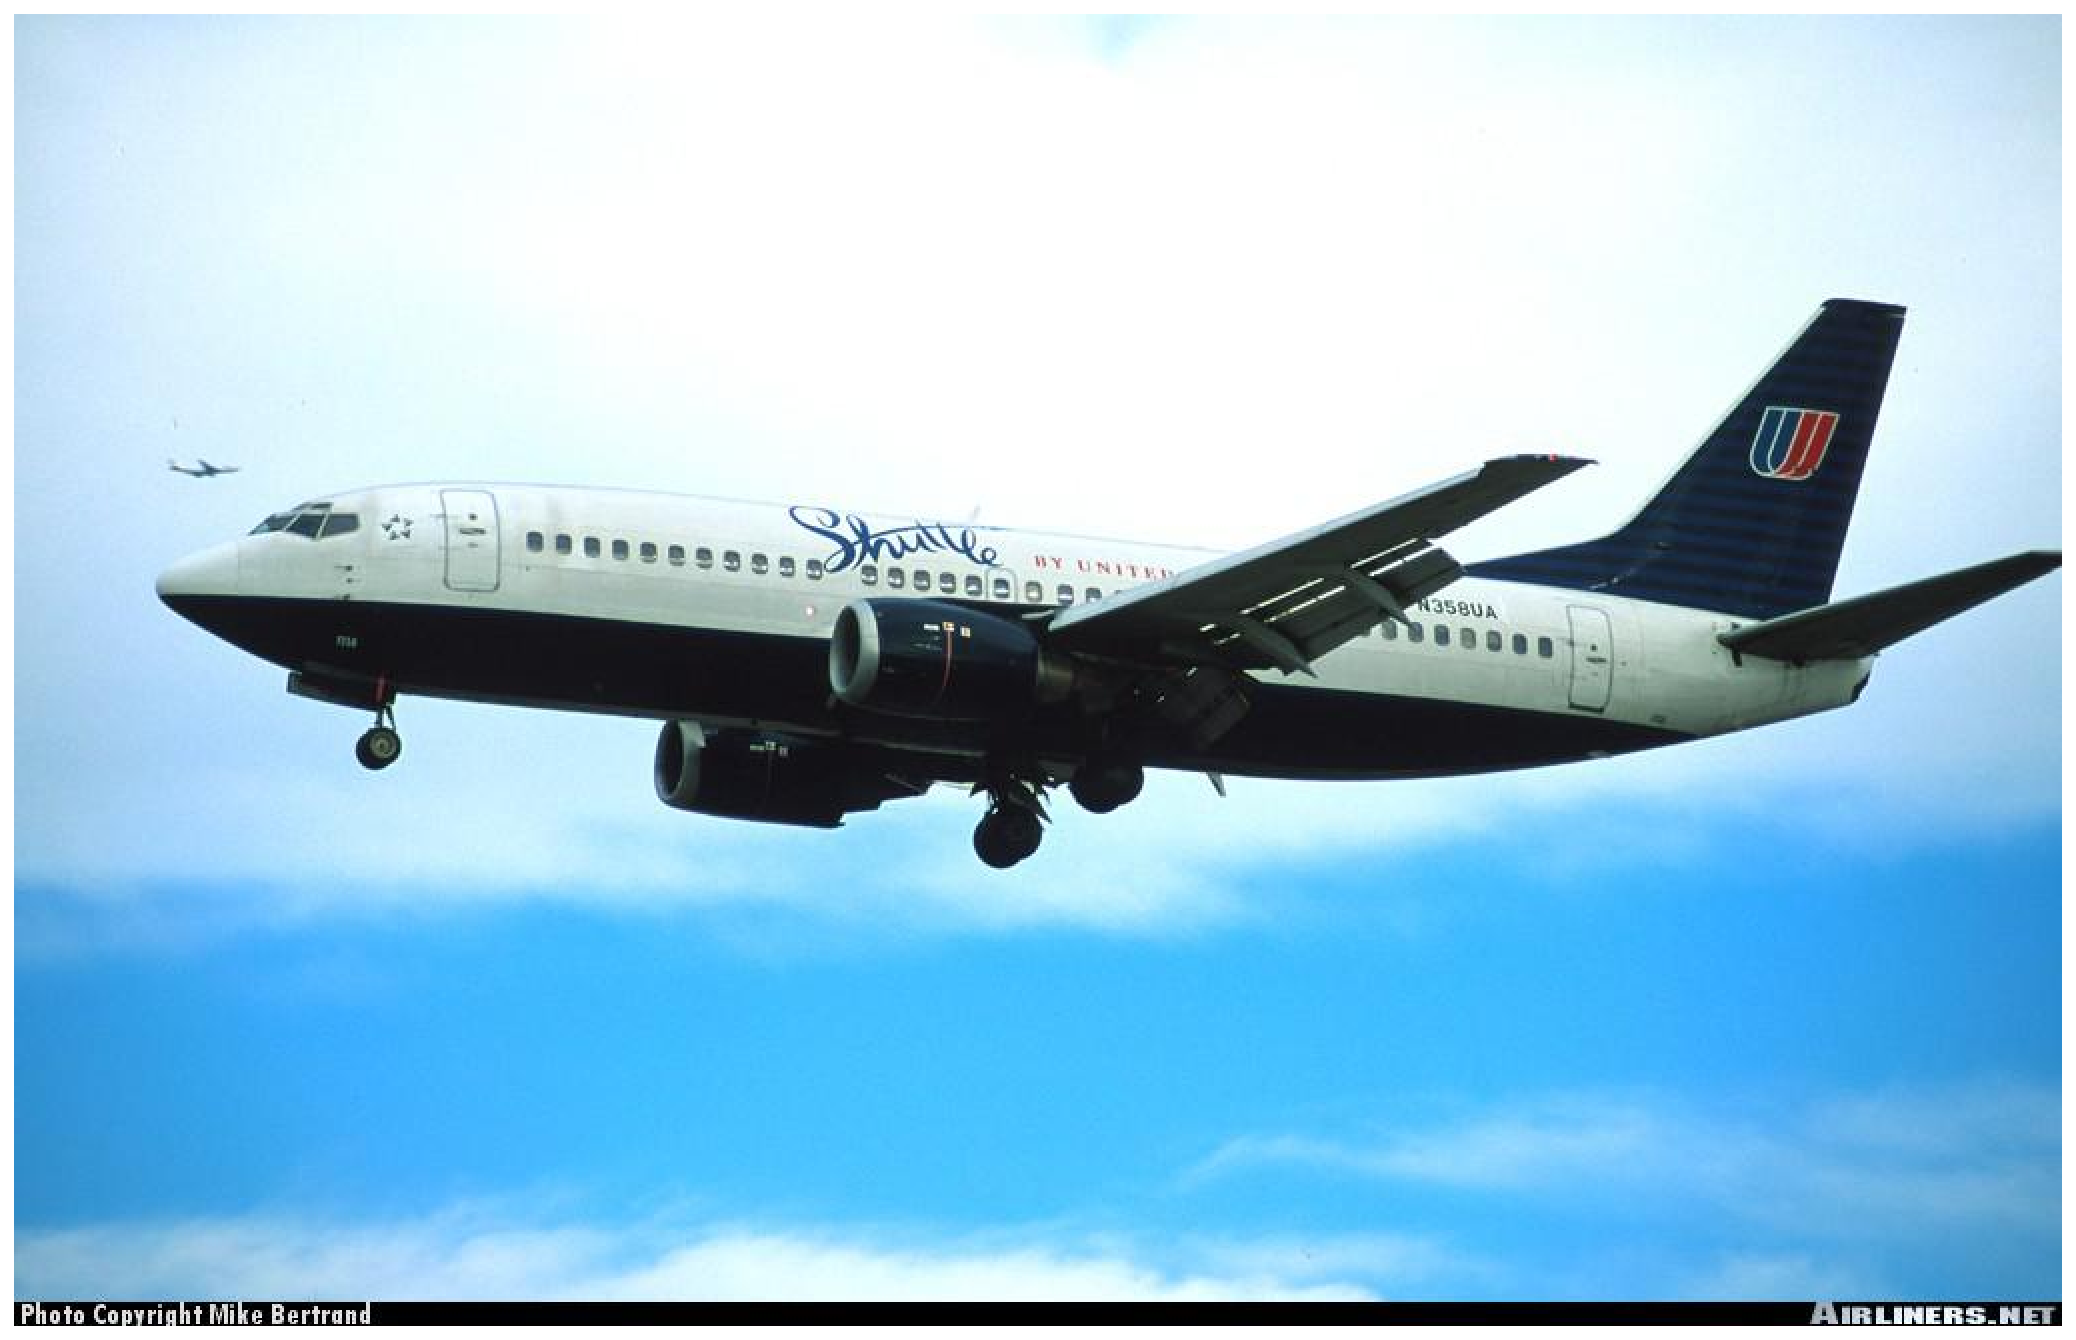

In [5]:
direct_display_image(image)

## Half resize

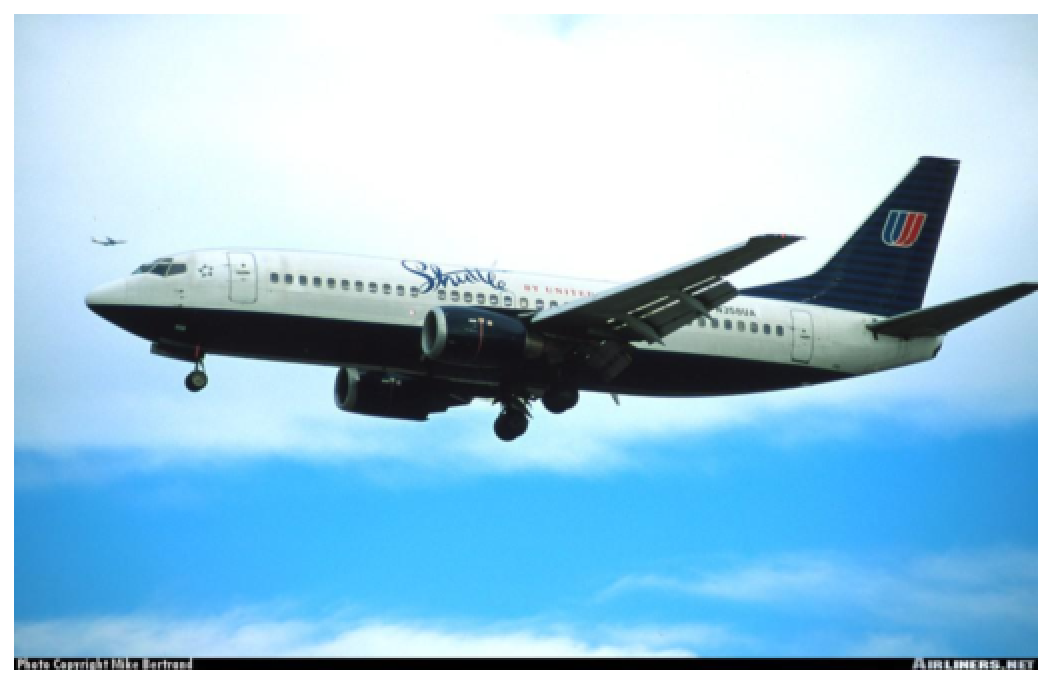

In [6]:
direct_display_image(FT.resize(image, (round(h/2), round(w/2)), interpolation=Image.LINEAR))

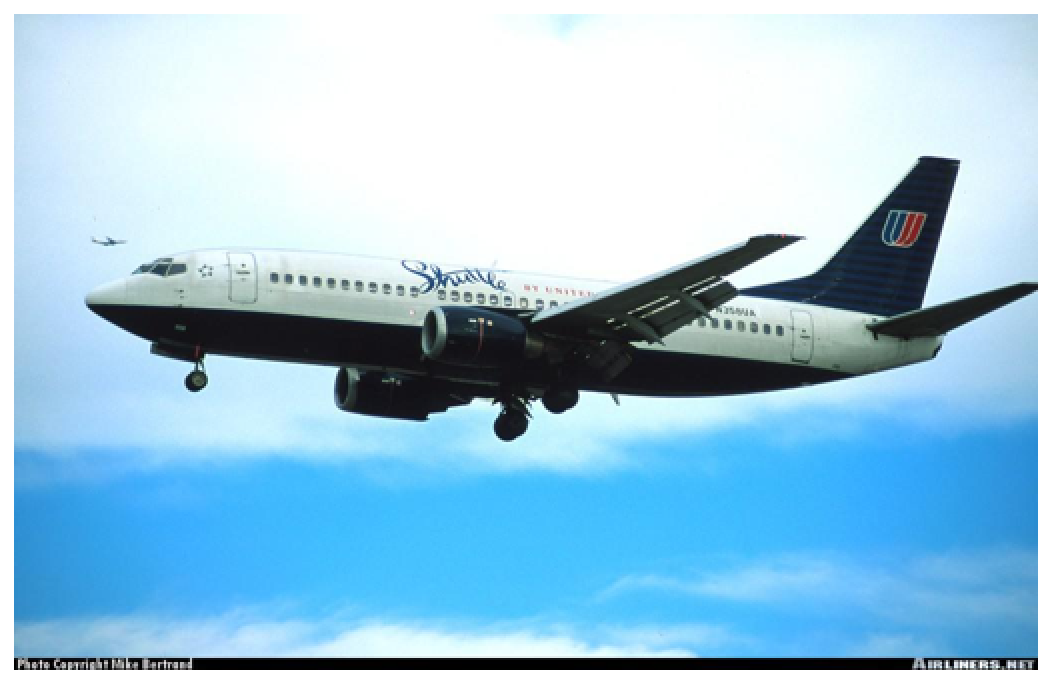

In [7]:
direct_display_image(FT.resize(image, (round(h/2), round(w/2)), interpolation=Image.CUBIC))

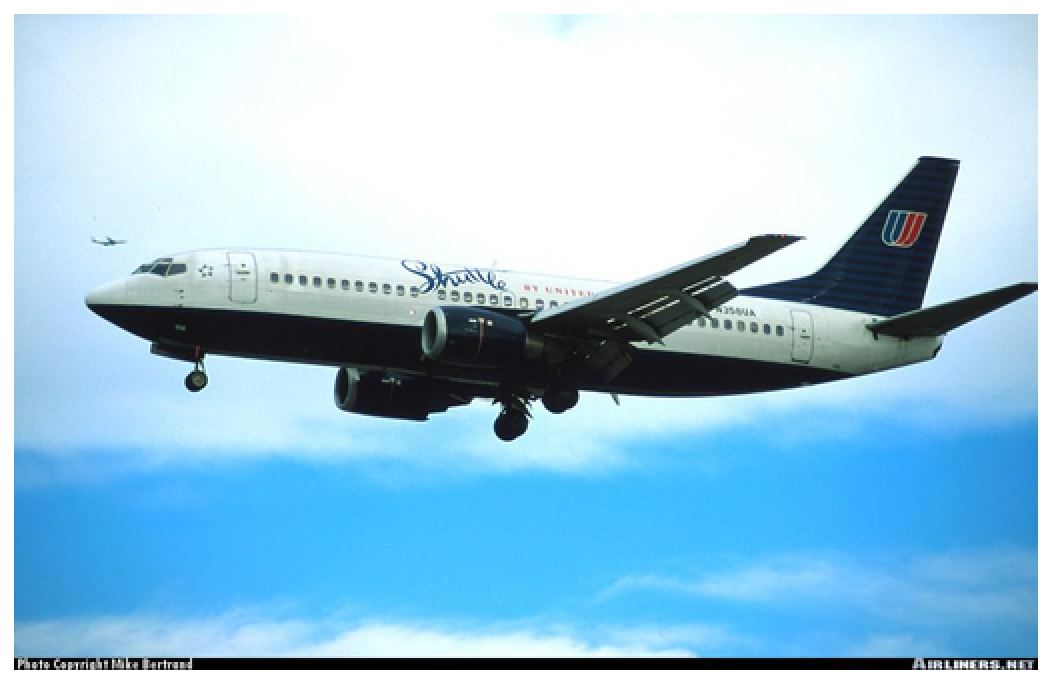

In [8]:
direct_display_image(FT.resize(image, (round(h/2), round(w/2)), interpolation=Image.LANCZOS))

## Resize to 256 pixels

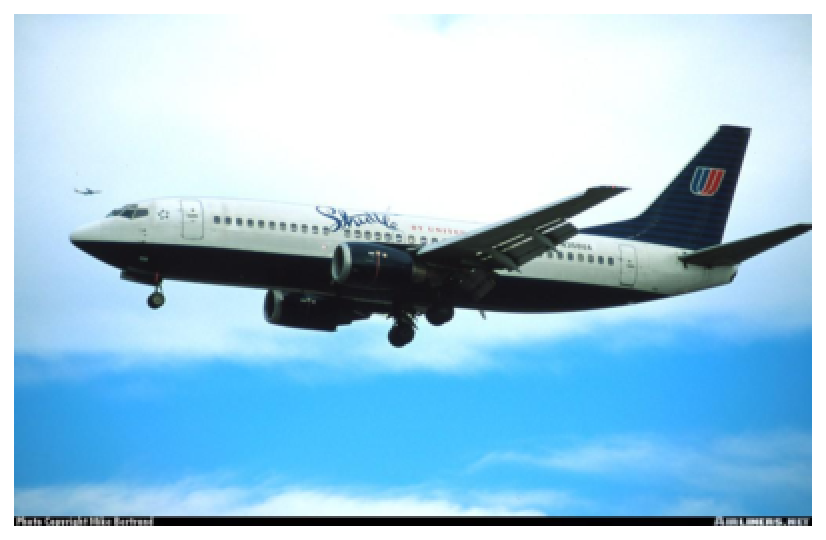

In [9]:
direct_display_image(FT.resize(image, 256, interpolation=Image.LINEAR))

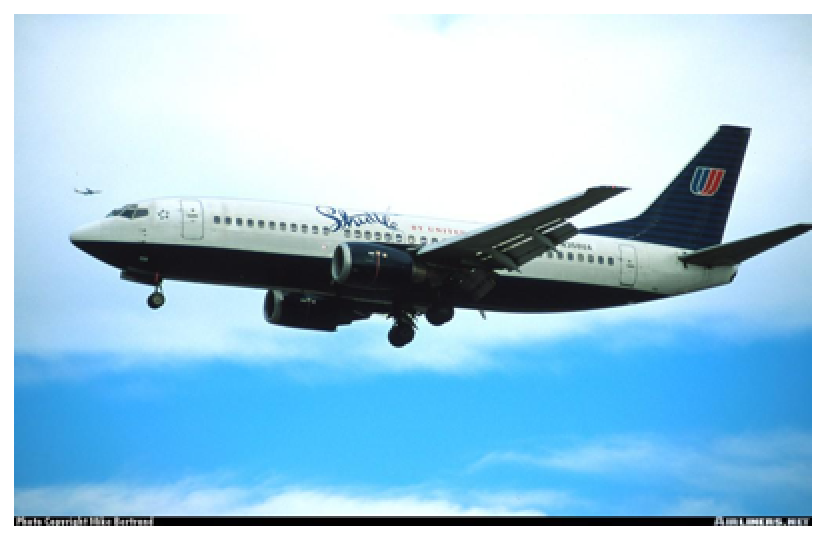

In [10]:
direct_display_image(FT.resize(image, 256, interpolation=Image.CUBIC))

## Resize to 96 pixels

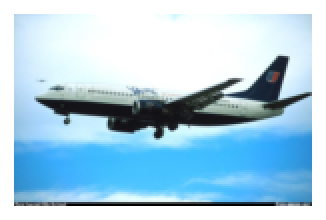

In [11]:
direct_display_image(FT.resize(image, 96, interpolation=Image.LINEAR))

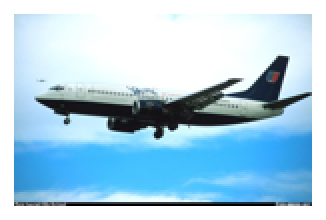

In [12]:
direct_display_image(FT.resize(image, 96, interpolation=Image.CUBIC))

## Resize to Resnet input

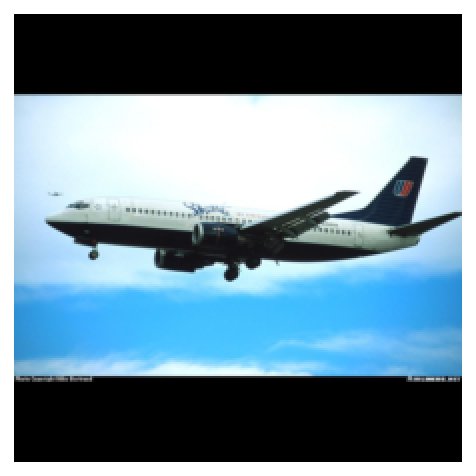

In [13]:
direct_display_image(resize(image, inter=Image.LINEAR))

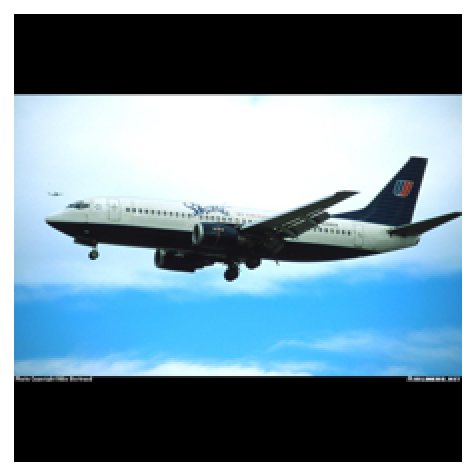

In [14]:
direct_display_image(resize(image, inter=Image.CUBIC))

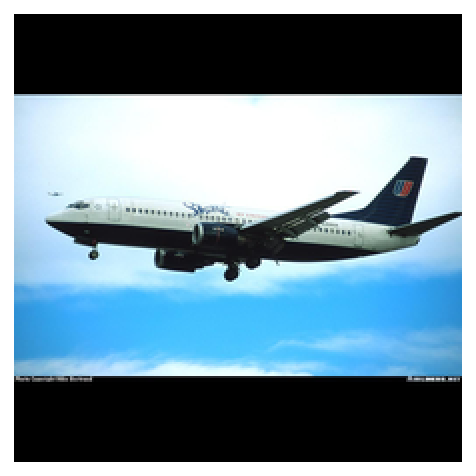

In [15]:
direct_display_image(resize(image, inter=Image.LANCZOS))

## Resize + augmentation

### Order check

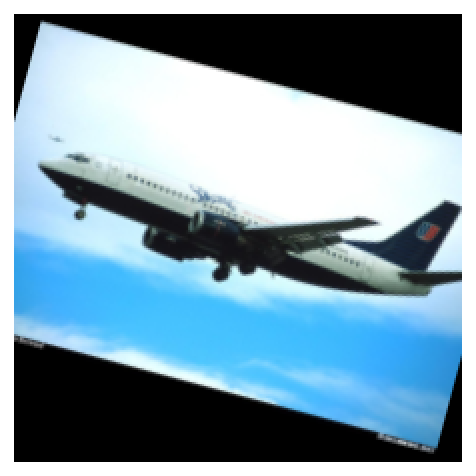

In [16]:
direct_display_image(augment(resize(image, inter=Image.LINEAR), scale=1.1, inter=cv2.INTER_LINEAR))

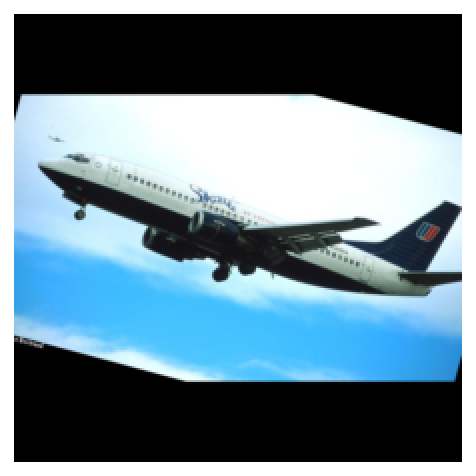

In [17]:
direct_display_image(resize(augment(image, scale=1.1, inter=cv2.INTER_LINEAR), inter=Image.LINEAR))

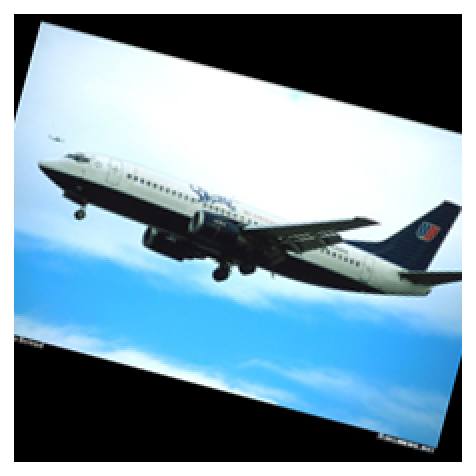

In [18]:
direct_display_image(augment(resize(image, inter=Image.CUBIC), scale=1.1, inter=cv2.INTER_CUBIC))

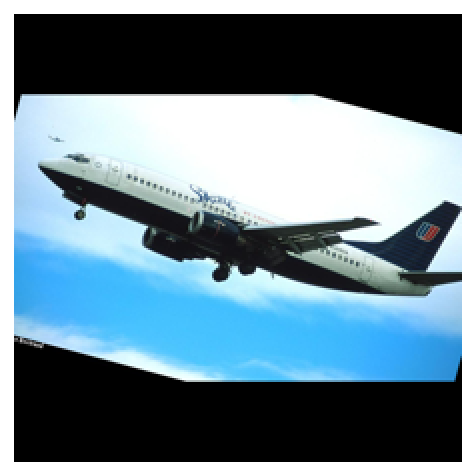

In [19]:
direct_display_image(resize(augment(image, scale=1.1, inter=cv2.INTER_CUBIC), inter=Image.CUBIC))

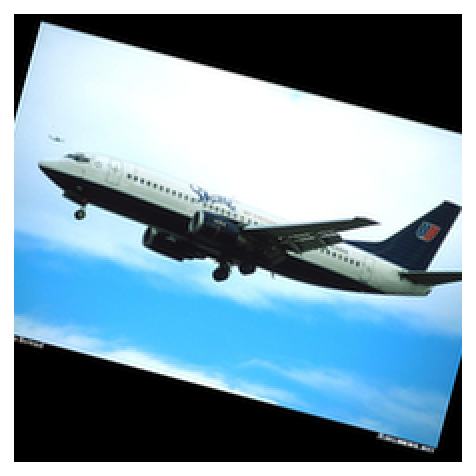

In [20]:
direct_display_image(augment(resize(image, inter=Image.LANCZOS), scale=1.1, inter=cv2.INTER_LANCZOS4))

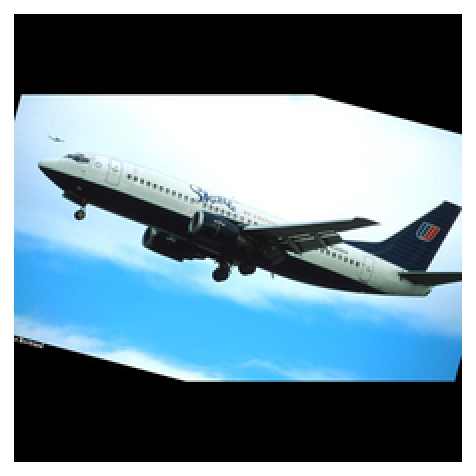

In [21]:
direct_display_image(resize(augment(image, scale=1.1, inter=cv2.INTER_LANCZOS4), inter=Image.LANCZOS))

### Interpolation check

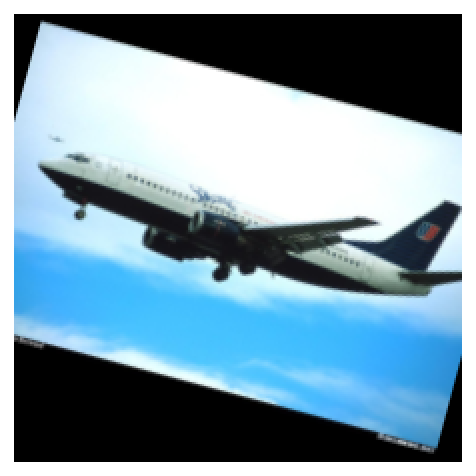

In [22]:
direct_display_image(augment(resize(image, inter=Image.LINEAR), scale=1.1, inter=cv2.INTER_LINEAR))

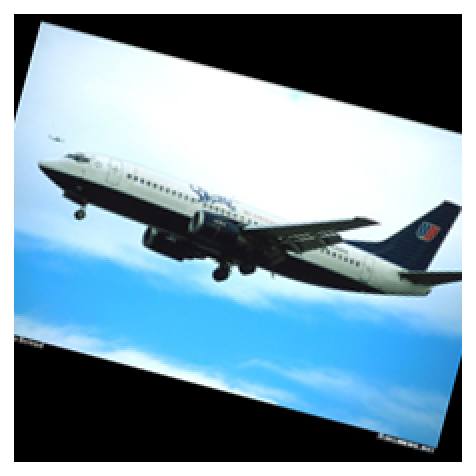

In [23]:
direct_display_image(augment(resize(image, inter=Image.CUBIC), scale=1.1, inter=cv2.INTER_CUBIC))

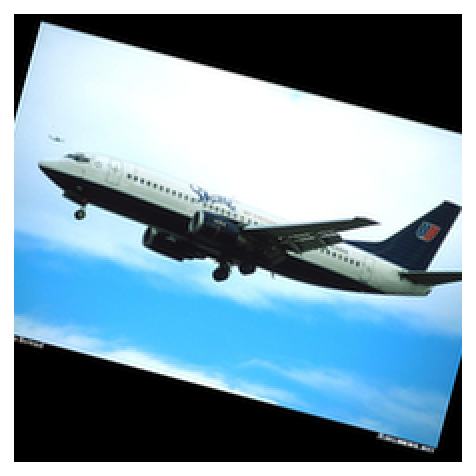

In [24]:
direct_display_image(augment(resize(image, inter=Image.LANCZOS), scale=1.1, inter=cv2.INTER_LANCZOS4))